# Imports

In [1]:
from pprint import pprint
from IPython.display import display
from hamilton import driver

import __init__ as webscraper

Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


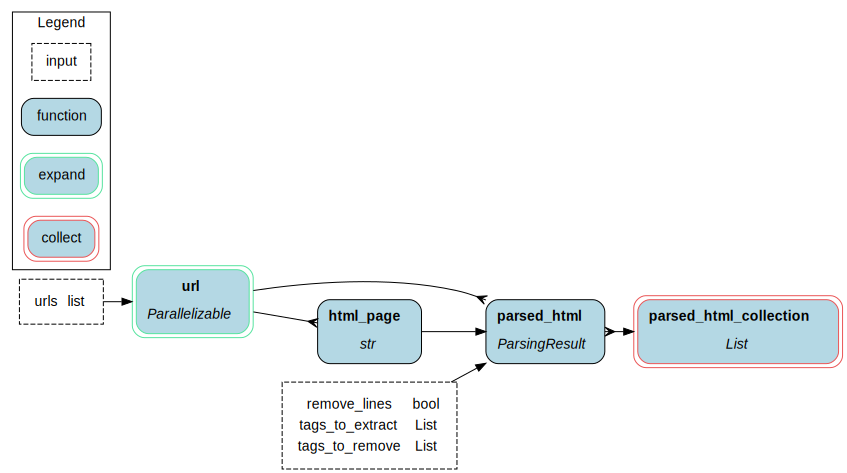

In [2]:
dr = (
    driver.Builder()
    .enable_dynamic_execution(allow_experimental_mode=True)  # this allows parallel/collect nodes
    .with_modules(webscraper)
    .build()
)

display(dr.display_all_functions(None))

In [3]:
final_vars = ["parsed_html_collection"]

inputs = dict(
    urls=[
        "https://blog.dagworks.io/p/llmops-production-prompt-engineering",
    ]
)

overrides = dict()

res = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides
)

pprint(list(res.keys()), width=1)

/home/tjean/projects/dagworks/hamilton/contrib/hamilton/contrib/user/zilto/webscraper/__init__.py:52: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 52 of the file /home/tjean/projects/dagworks/hamilton/contrib/hamilton/contrib/user/zilto/webscraper/__init__.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(html_page)


['parsed_html_collection']


In [4]:
res["parsed_html_collection"][0].parsed

'What you send to your LLM is quite important. Small variations and changes can have large impacts on outputs, so as your product evolves, the need to evolve your prompts will too. LLMs are also constantly being developed and released, and so as LLMs change, your prompts will also need to change. Therefore it’s important to set up an iteration pattern to operationalize how you “deploy” your prompts so you and your team can move efficiently, but also ensure that production issues are minimized, if not avoided. In this post, we’ll guide you through the best practices of managing prompts with Hamilton, making analogies to MLOps patterns, and discussing trade-offs along the way. Notes:(1): if you’re looking for a post that talks about “context management” this isn’t that post. But it is the post that will help you with the nuts and bolts on how to iterate and create that production grade “prompt context management” iteration story. (2): we’ll use prompt & prompt template interchangeably. (